## Imports

In the code cell below import the following
- pandas as __pd__,
- numpy as __np__, and
- matplotlib.pyplot as __plt__.
- seaborn as __sns__.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Activity 1


Write code to perform following:
1. Read in the dataset on AWS at [Brazilian-fire-dataset.csv]( https://ddc-datascience.s3.amazonaws.com/Brazilian-fire-dataset.csv ) and save it to a variable called `df_ffire`.
1. Display the top 10 rows of the data frame.
1. Generate summary statistics for all columns.

In [121]:
url = pd.read_csv('https://ddc-datascience.s3.amazonaws.com/Brazilian-fire-dataset.csv')

df_ffire = pd.DataFrame(url)

df_ffire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             6454 non-null   int64  
 1   State            6454 non-null   object 
 2   Month            6454 non-null   object 
 3   Number of Fires  6454 non-null   float64
 4   Date Reported    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


Based on the information collected so far, can you answer the following:

1.  What is the maximum number of fires reported on any given day?
2. In the dataset what is the total number of states for which the fire incidents have been reported?

In [122]:
max_value_row = df_ffire.loc[df_ffire.iloc[:, 3].idxmax()]
max_value_row

Year                    2008
State               Amazonas
Month              September
Number of Fires        998.0
Date Reported      1/01/2008
Name: 888, dtype: object

## Activity 2


1. Change the `Date Reported` column to a datetime object.
2. Filter the `df_ffire` data frame to only keep the rows that are in the Acre, Bahia or Mato Grosso states. Save this filtered data frame as `df_ffire_filt`.
3. Create a seaborn line plot of `df_ffire_filt` with the `Date Reported` on the x-axis, the `Number of Fires` on the y-axis and the `State` as the hue.

In [123]:
df2 = df_ffire.iloc[:, 4] = print(pd.to_datetime(df_ffire.iloc[:, 4]))

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
6449   2012-01-01
6450   2013-01-01
6451   2014-01-01
6452   2015-01-01
6453   2016-01-01
Name: Date Reported, Length: 6454, dtype: datetime64[ns]


In [124]:
df2_ffire = df_ffire.copy()

In [128]:
df_ffire_filt = df2_ffire[df2_ffire['State'] == 'Bahia' ]
df_ffire_filt2 = df2_ffire[df2_ffire['State'] == 'Acre']
df_ffire_filt3 = df2_ffire[df2_ffire['State'] == 'Mato Grosso']
print(df_ffire_filt)
print(df_ffire_filt2)
print(df_ffire_filt3)

      Year  State     Month  Number of Fires Date Reported
957   1998  Bahia   January            0.000          None
958   1999  Bahia   January          114.000          None
959   2000  Bahia   January           31.000          None
960   2001  Bahia   January           24.000          None
961   2002  Bahia   January          125.000          None
...    ...    ...       ...              ...           ...
1191  2012  Bahia  December          477.000          None
1192  2013  Bahia  December          131.000          None
1193  2014  Bahia  December          144.000          None
1194  2015  Bahia  December            1.408          None
1195  2016  Bahia  December          164.000          None

[239 rows x 5 columns]
     Year State     Month  Number of Fires Date Reported
0    1998  Acre   January              0.0          None
1    1999  Acre   January              0.0          None
2    2000  Acre   January              0.0          None
3    2001  Acre   January              0

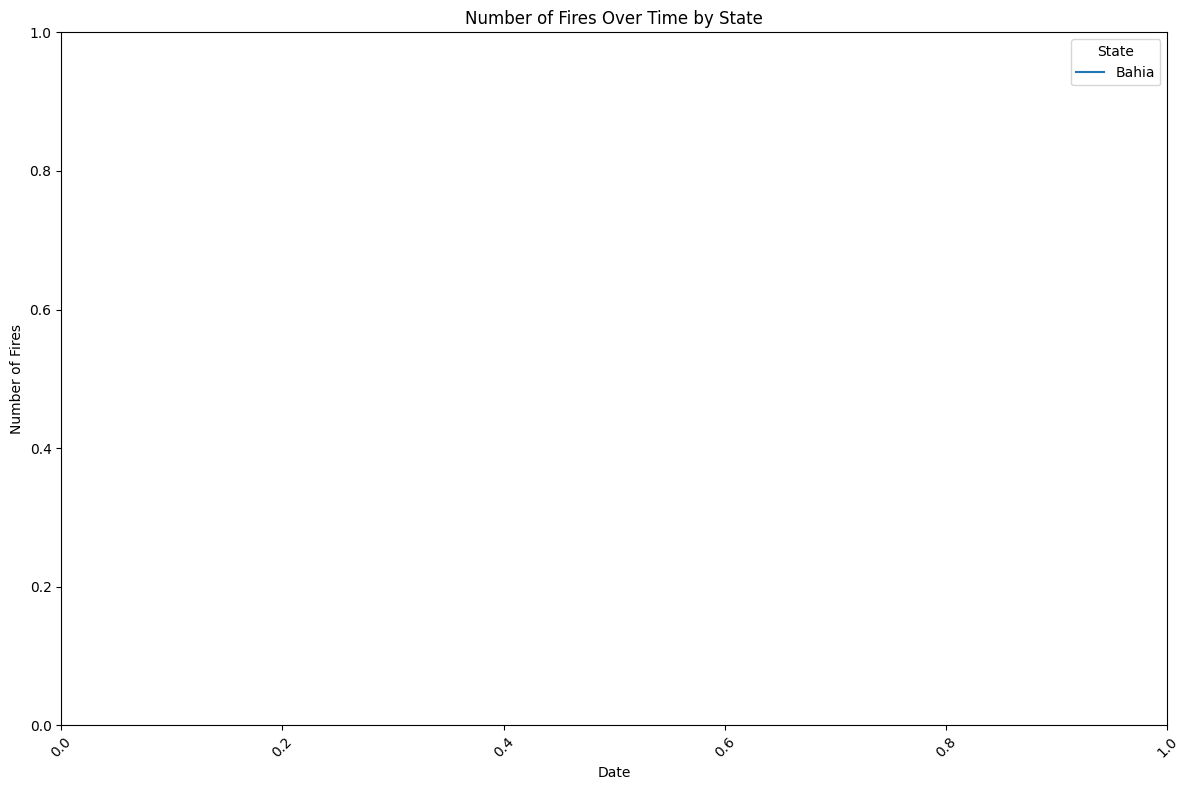

In [126]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the line plot
sns.lineplot(data=df_ffire_filt, 
             x='Date Reported', 
             y='Number of Fires', 
             hue='State')

# Customize the plot
plt.title('Number of Fires Over Time by State')
plt.xlabel('Date')
plt.ylabel('Number of Fires')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Activity 3
1. Find which state has recorded the maximum number of fires on any given day (not the total sum), and in which month did it occur?

HINT:
- Create a boolean filter based on condition on column __Number of Fires__, and
- Using this filter perform an indexing operation on the DataFrame to retrieve the corresponding records

## Activity 4

1. Calculate the total number of fires for the entire duration (i.e. for 1998 to 2018) for every state. Save the result to a data frame called `df_group_states`.
2. Print the Summary Statistics for `df_group_states` - and what is the minimum and maximum number of total fires records?
4. Which state has recorded the minimum number of total fires, and which state has recorded the maximum number of total fires?

__HINT:__
- Use the `groupby` operation on the State column.
- Pandas has methods `idxmax()` and `idxmin()` which return the indices corresponding to the maximum and minimum values respectively, in a Pandas Series (or a Column in DataFrame).

## Activity 5

1. Reset the index of the `df_group_states` DataFrame so that States are not considered as index, and are rather considered as Data Column (Hint: use method __reset_index()__ for this operation
2. Arrange the DataFrame in descending order of "Total Number of Fires".
3. Create a seaborn barplot with the State on the x-axis and the Number of Fires on the y-axis. Rotate the State labels on the x-axis so they are easier to read.
    
